# Covid-19 : Data Analysis

#  Introduction

Importing all the Libraries that we need to do this project work

In [29]:
import numpy as np
import pandas as pd
import os

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 29.05.2021

In [31]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Shape of the dataset

In [32]:
df.shape

(306429, 8)

Information regarding the dataset

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


convert the ObservationDate and Last Update to datetime

convert The 'Confirmed' , 'Deaths' and 'Recovered'  into int datatype for the simplicity of the usage

In [34]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='mixed', errors='coerce')
df['Last Update'] = pd.to_datetime(df['Last Update'], format='mixed', errors='coerce')
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')
# Convert date columns with error handling
# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], errors='coerce')
# df['Last Update'] = pd.to_datetime(df['Last Update'],errors='coerce')
# 
# # Convert numeric columns with error handling
# df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce').fillna(0).astype('int')
# df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce').fillna(0).astype('int')
# df['Recovered'] = pd.to_numeric(df['Recovered'], errors='coerce').fillna(0).astype('int')
# df

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [35]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
305664,305665,2021-05-29,NaN,Afghanistan,2021-05-30 04:20:55,70111,2899,57281
305665,305666,2021-05-29,NaN,Albania,2021-05-30 04:20:55,132297,2449,129215
305666,305667,2021-05-29,NaN,Algeria,2021-05-30 04:20:55,128456,3460,89419
305667,305668,2021-05-29,NaN,Andorra,2021-05-30 04:20:55,13693,127,13416
305668,305669,2021-05-29,NaN,Angola,2021-05-30 04:20:55,34180,757,27646
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641,2335,95289
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147,245,0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364,1,1324
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550,1738,83790


Out of the 306429 records we are now left with only 758 and many of the records don't have the Province defined

In [36]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     172
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [37]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)
df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

In [38]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)
df['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']=='Mainland China' else x['Country/Region'],axis=1)

We are performing the encoding of the country to CountryID and Province to ProvinceID

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ProvinceID,CountryID
305664,305665,2021-05-29,Afghanistan,Afghanistan,2021-05-30 04:20:55,70111,2899,57281,3,0
305665,305666,2021-05-29,Albania,Albania,2021-05-30 04:20:55,132297,2449,129215,10,1
305666,305667,2021-05-29,Algeria,Algeria,2021-05-30 04:20:55,128456,3460,89419,12,2
305667,305668,2021-05-29,Andorra,Andorra,2021-05-30 04:20:55,13693,127,13416,22,3
305668,305669,2021-05-29,Angola,Angola,2021-05-30 04:20:55,34180,757,27646,23,4


## Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

<Axes: >

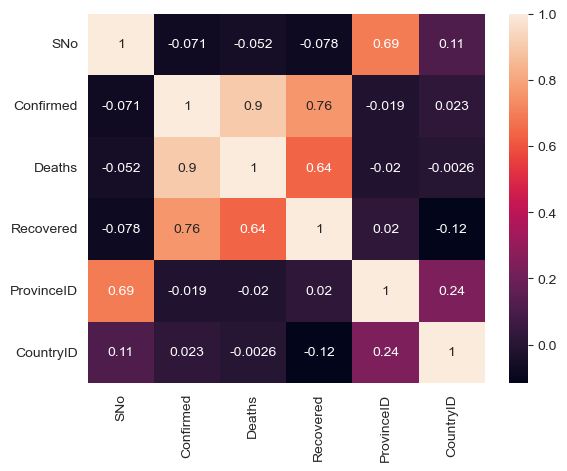

In [40]:
# corr = df_update.corr()
# sns.heatmap(corr, annot = True)
numeric_df = df_update.select_dtypes(include=['number'])

# Calculate correlation
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)

**********************

## countries were affected by Covid-19

In [41]:
print(df['Country/Region'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['Country/Region'].unique()))

['China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam'
 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands'
 'Gibraltar' 'Liechtenstein' 'Poland' 'Tuni

***********

## Percentage of confirmed cases per country through the Pie-chart

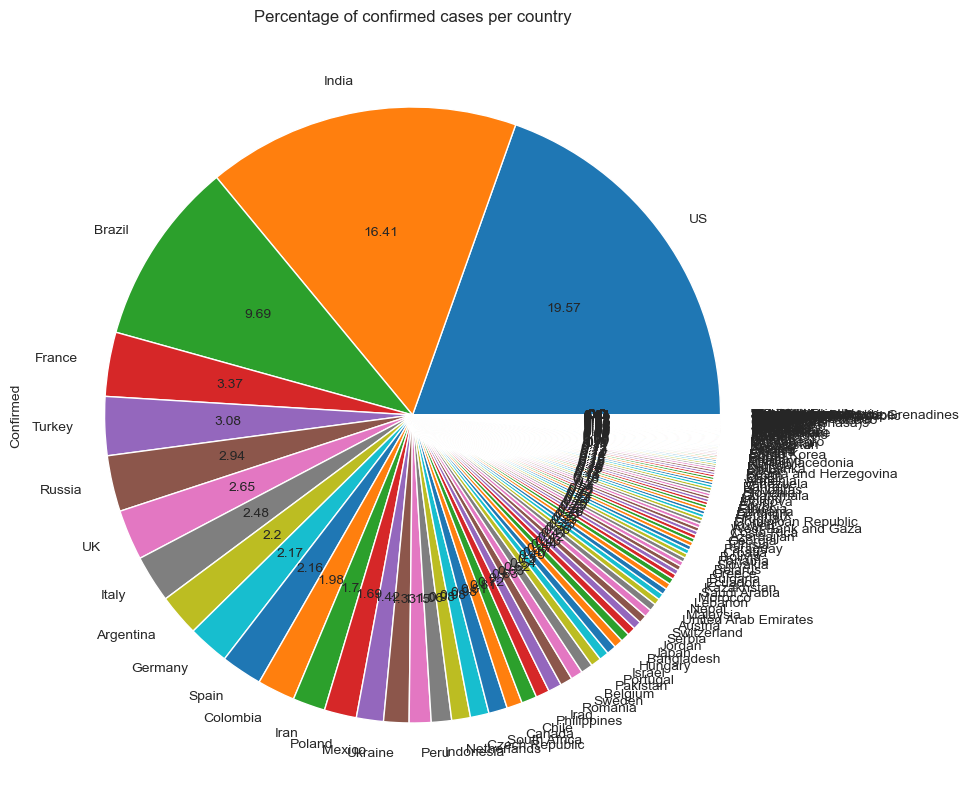

In [42]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

****************

## Top 5 countries having most number of confirmed cases

In [43]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,Country/Region,Confirmed,Recovered,Deaths
0,US,33251939,0,594306
1,India,27894800,25454320,325972
2,Brazil,16471600,14496224,461057
3,France,5719877,390878,109518
4,Turkey,5235978,5094279,47271


**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [44]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered,Deaths,Recovery Rate,Death Rate
0,US,33251939,0,594306,0.000000,0.020000
1,India,27894800,25454320,325972,0.910000,0.010000
2,Brazil,16471600,14496224,461057,0.880000,0.030000
3,France,5719877,390878,109518,0.070000,0.020000
4,Turkey,5235978,5094279,47271,0.970000,0.010000


*************

## Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries

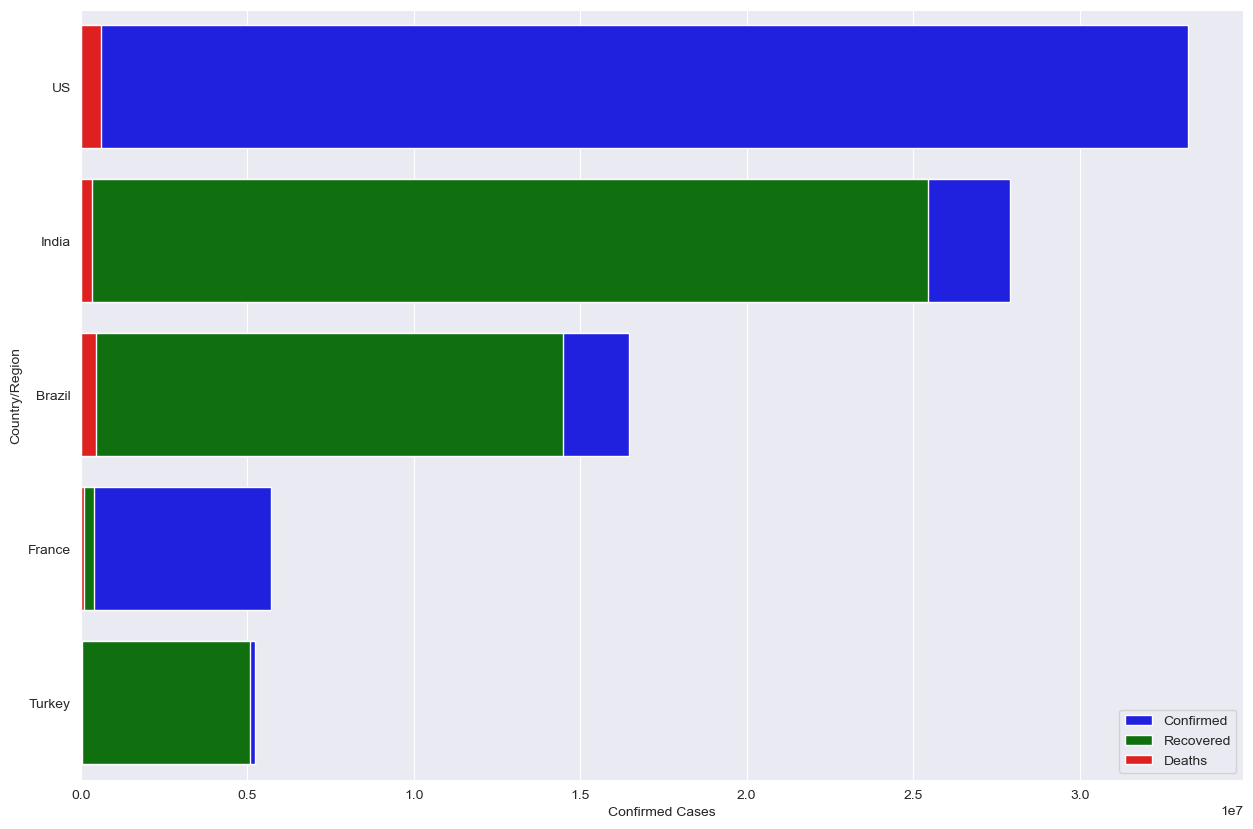

In [45]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="Confirmed",y="Country/Region",data=group_cases,
            label="Confirmed", color="b")


bar2=sns.barplot(x="Recovered", y="Country/Region", data=group_cases,
            label="Recovered", color="g")


bar3=sns.barplot(x="Deaths", y="Country/Region", data=group_cases,
            label="Deaths", color="r")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

*************

## Recovered Cases v/s Death Cases in the Top 5 countries

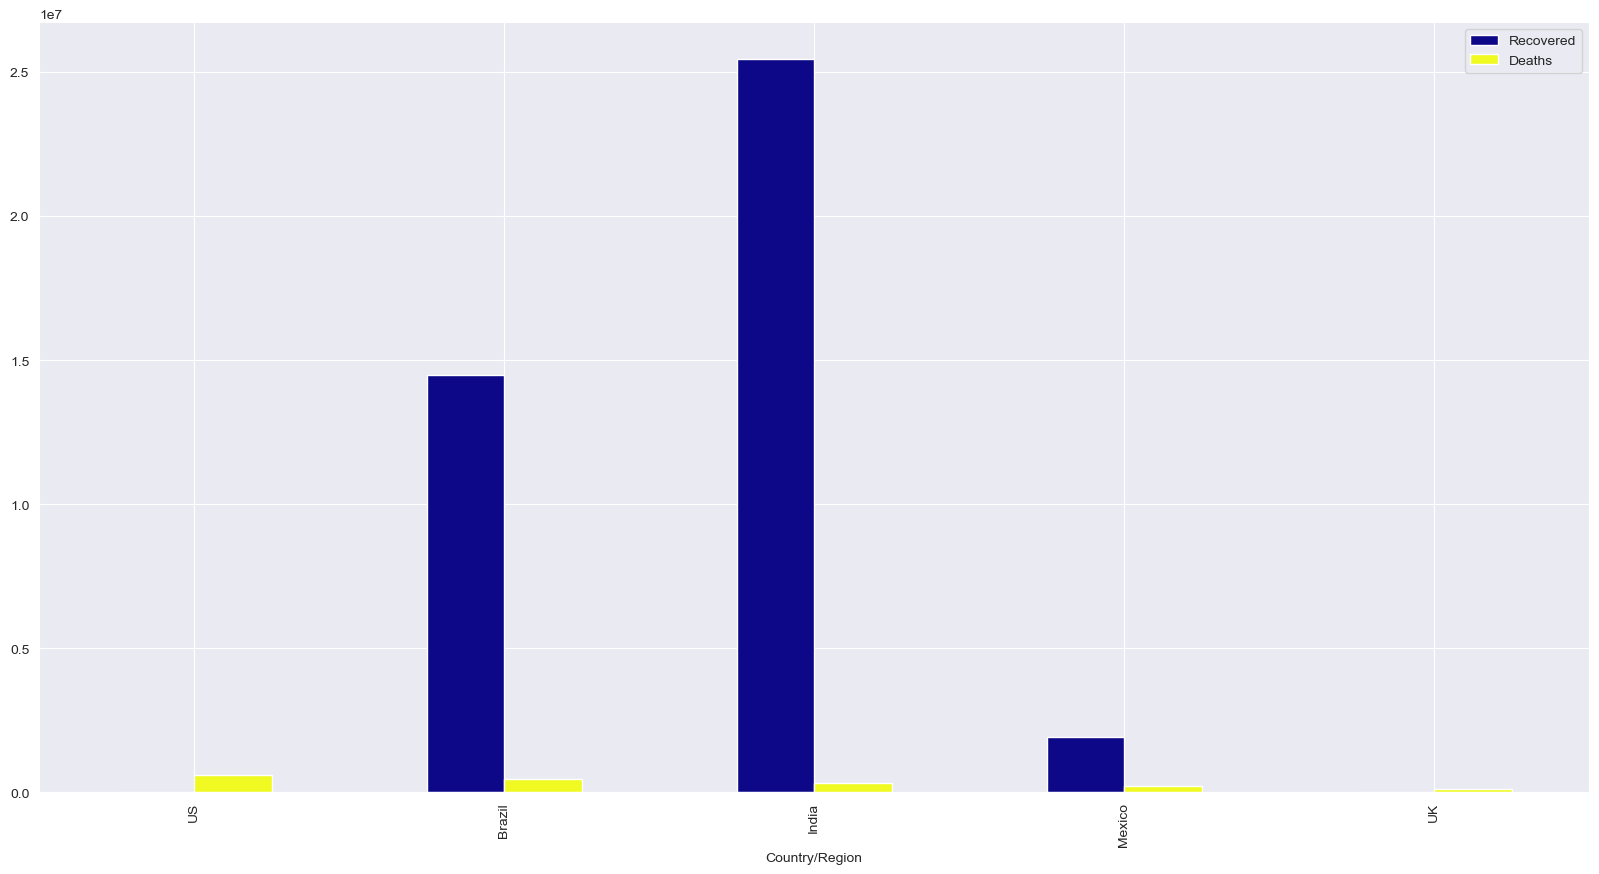

In [46]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

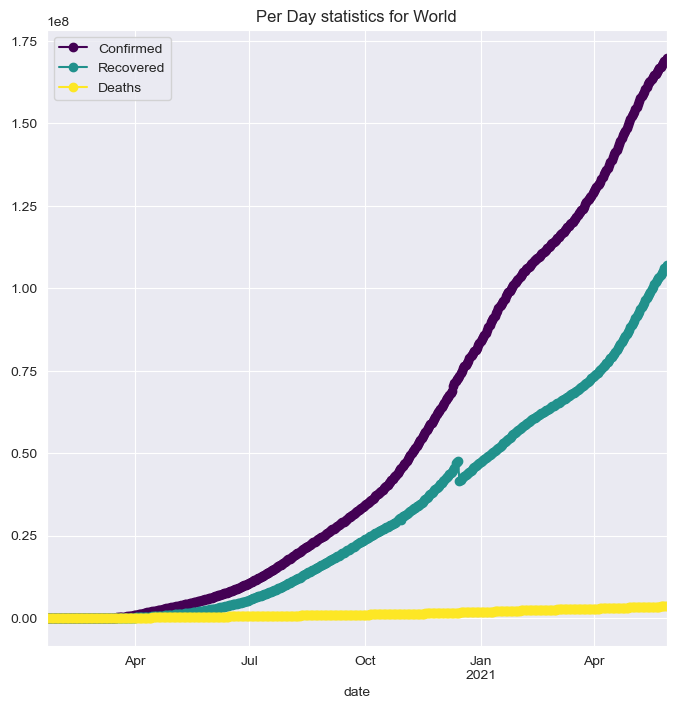

In [51]:
global_cases_complete=df.loc[~(df['Country/Region']=='China')]
global_cases_complete['date'] = global_cases_complete['ObservationDate'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

### Increment in the stats in the recent times (from 8th Aug, 2020 to 29th May, 2021)

In [52]:
num_plot_global=num_plot.reset_index()
num_plot_global['Death Case Increase']=0
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
num_plot_global['Death Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
    num_plot_global['Death Case Increase'][i]=-(num_plot_global.iloc[i-1][3]-num_plot_global.iloc[i][3])
num_plot_global.tail()

,date,Confirmed,Recovered,Deaths,Death Case Increase,Confirmed Case Increase
489,2021-05-25,167757188,104738872,3481152,12752,531832
490,2021-05-26,168325385,105294673,3493908,12756,568197
491,2021-05-27,168879746,105992009,3506661,12753,554361
492,2021-05-28,169379664,106546957,3518481,11820,499918
493,2021-05-29,169860488,107054552,3528983,10502,480824


### Total Confirmed Cases in the World (Excluding China) 

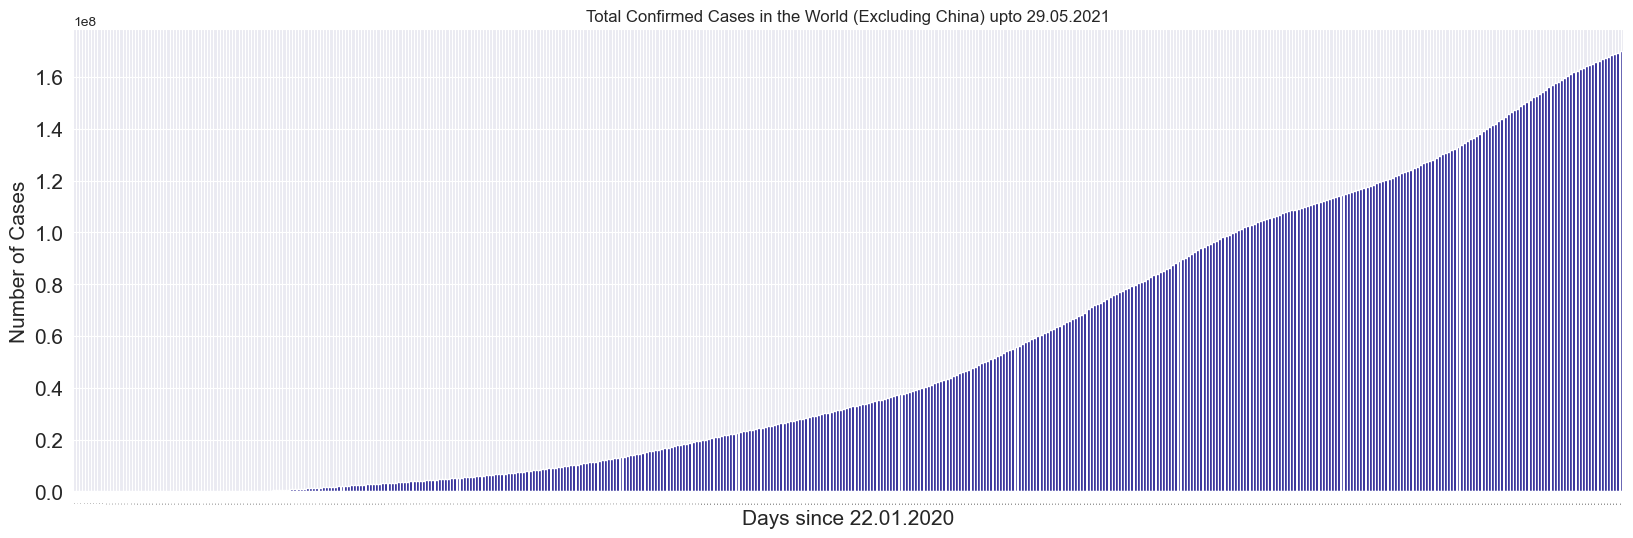

In [53]:
num_plot_global['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total Confirmed Cases in the World (Excluding China) upto 29.05.2021',colormap='plasma')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Recovered Cases in the World (Excluding China) upto 29.05.2021

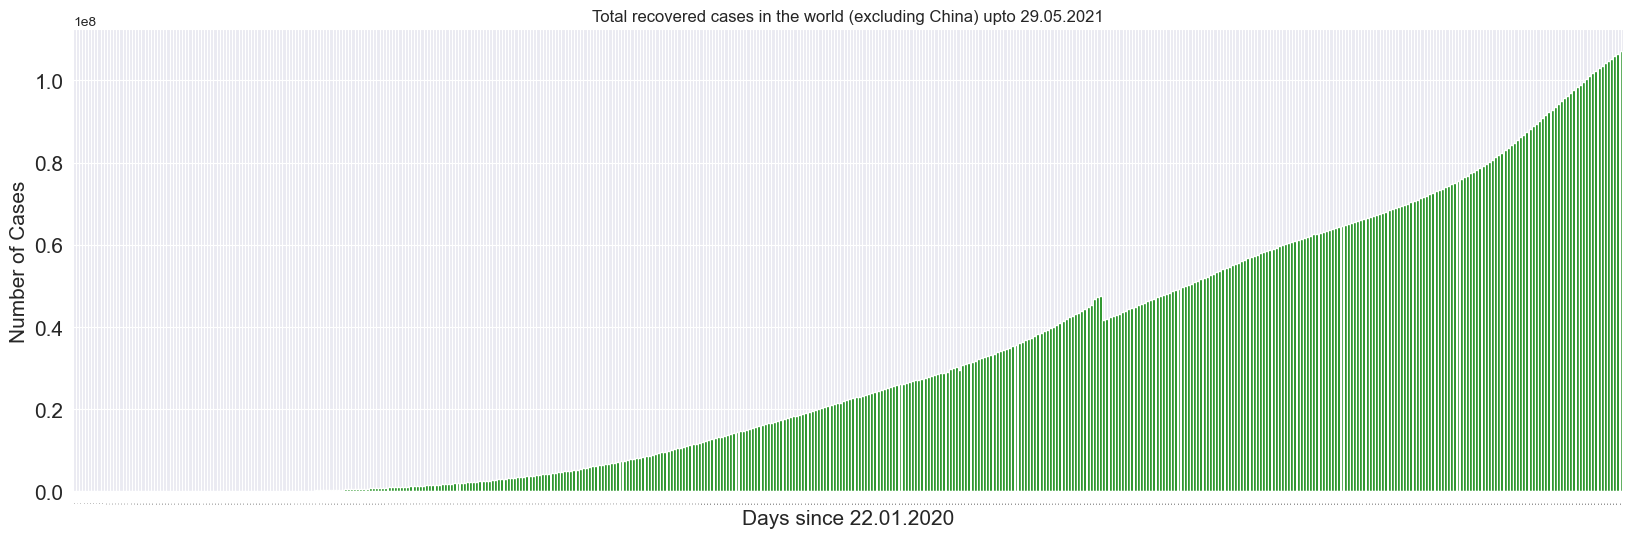

In [54]:
num_plot_global['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total recovered cases in the world (excluding China) upto 29.05.2021',colormap='ocean')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Death Cases in the World (Excluding China) upto 29.05.2021

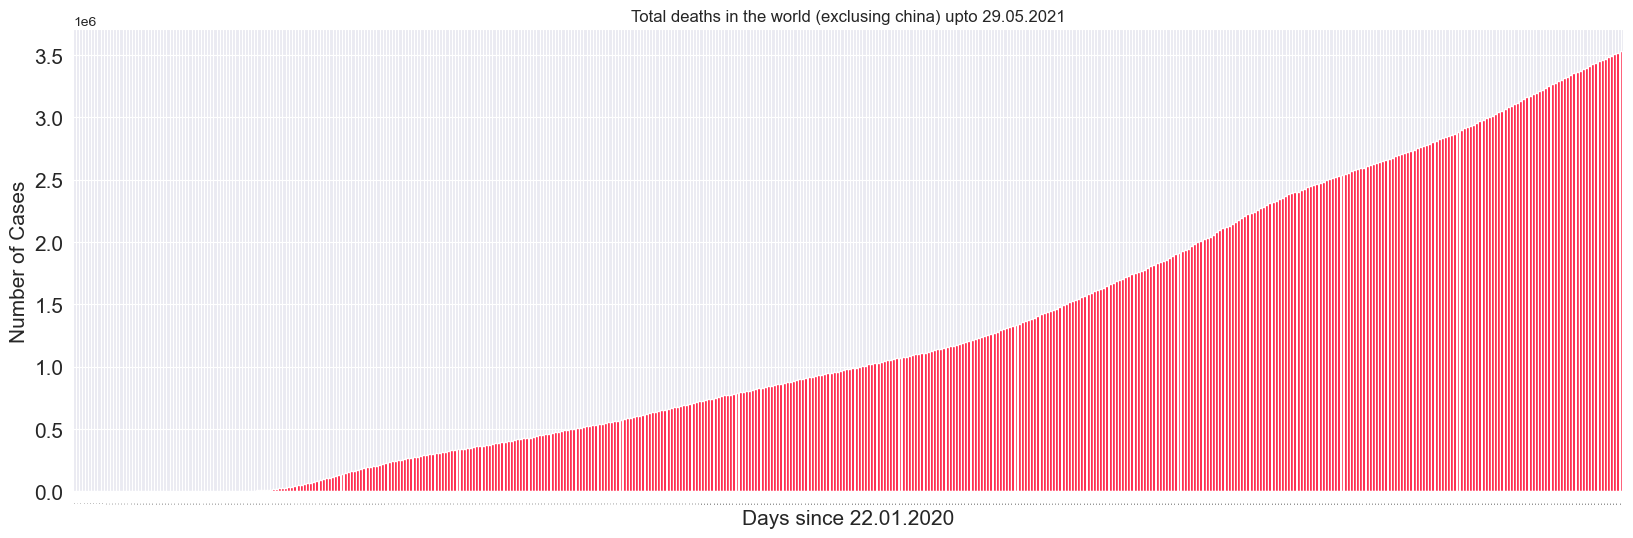

In [55]:
num_plot_global['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),title='Total deaths in the world (exclusing china) upto 29.05.2021',colormap='gist_rainbow')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total Confirmed Cases Increase in the World (Excluding China) upto 29.05.2021

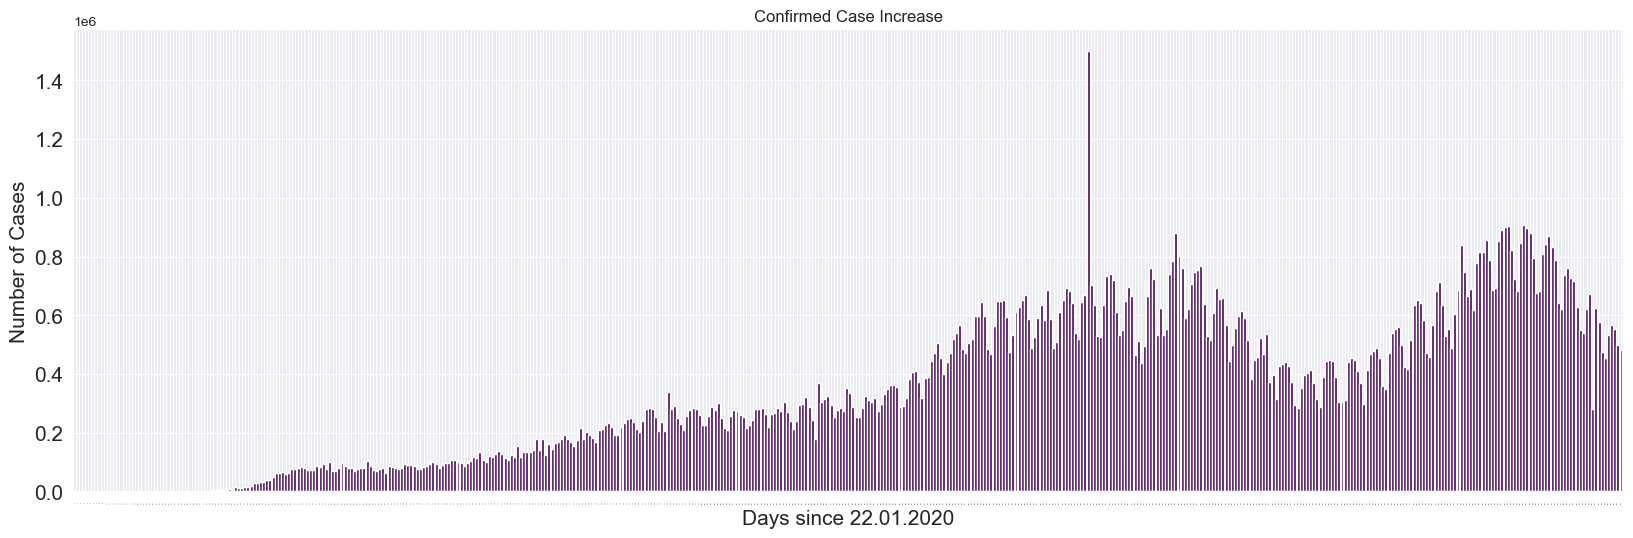

In [56]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Death Cases Increase in the World (Excluding China) upto 29.05.2021

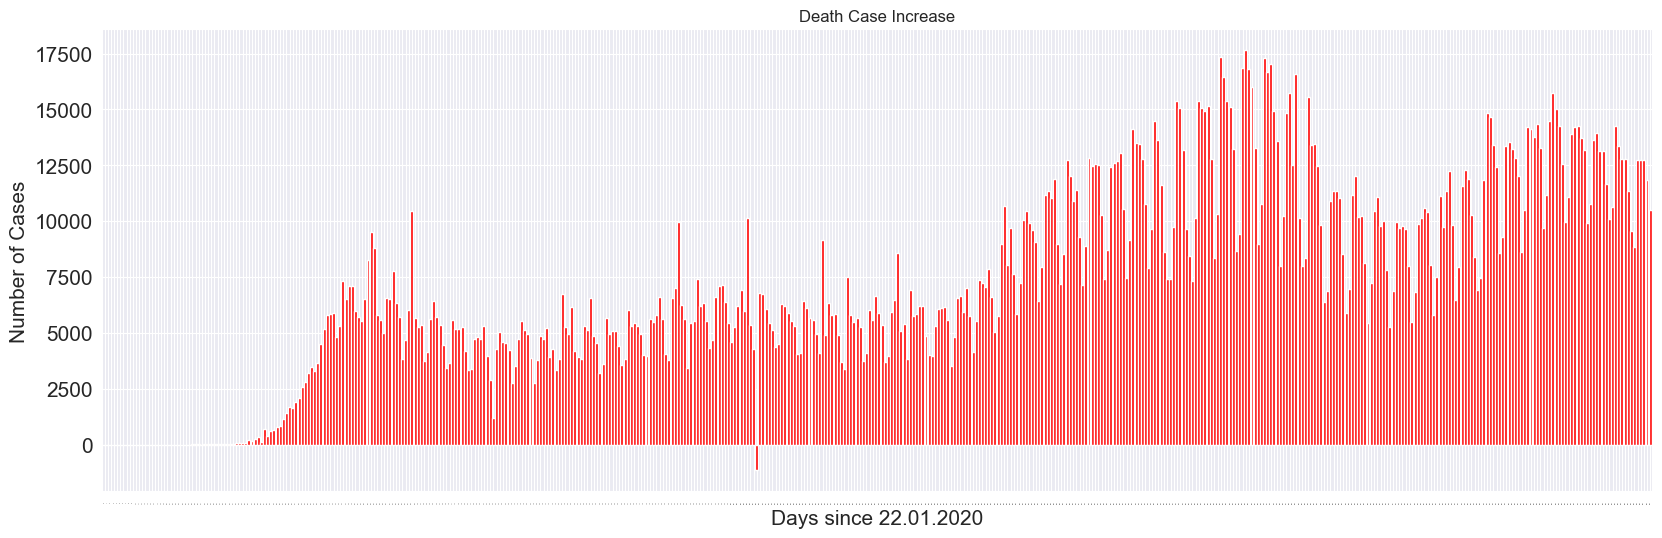

In [57]:
num_plot_global['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Death Case Increase',colormap='autumn')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Per Day Statistics for India till  29th May, 2021

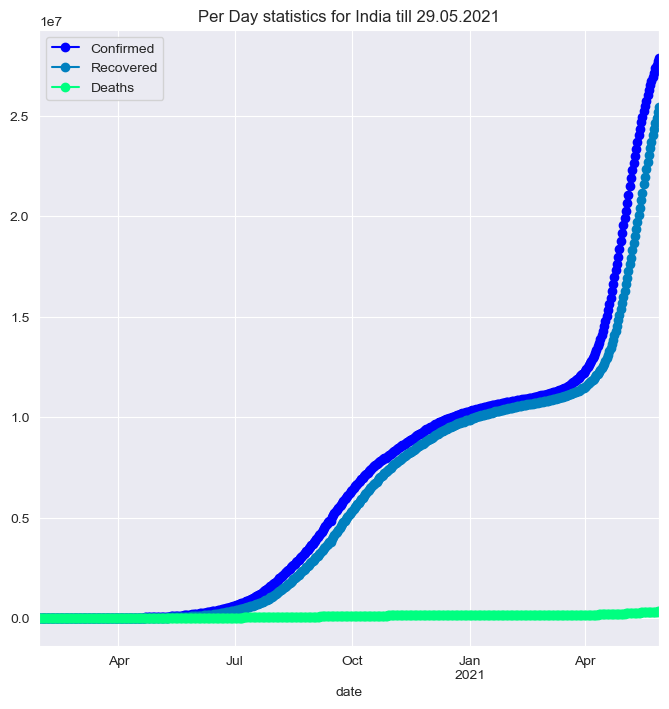

In [59]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()
num_plot['Confirmed'][132]=287154
num_plot['Recovered'][132]=140928
num_plot['Deaths'][132]=8106
num_plot['Confirmed'][134]=309595
num_plot['Recovered'][134]=154235
num_plot['Deaths'][134]=8888
num_plot['Confirmed'][135]=321634
num_plot['Recovered'][135]=162327
num_plot['Deaths'][135]=9197
num_plot['Confirmed'][136]=333039
num_plot['Recovered'][136]=169684
num_plot['Deaths'][136]=9521
num_plot['Confirmed'][137]=343071
num_plot['Recovered'][137]=180324
num_plot['Deaths'][137]=9917
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India till 29.05.2021',marker='o')
num_plot_india=num_plot.reset_index()

### Cases reported in the recent times in India

In [60]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
#num_plot_india['Confirmed'][132]=287154
#num_plot_india['Recovered'][132]=140928
#num_plot_india['Deaths'][132]=8106
#num_plot_india['Confirmed'][134]=309595
#num_plot_india['Recovered'][134]=154235
#num_plot_india['Deaths'][134]=8888
#num_plot_india['Confirmed'][135]=321634
#num_plot_india['Recovered'][135]=162327
#num_plot_india['Deaths'][135]=9197
#num_plot_india['Confirmed'][136]=333039
#num_plot_india['Recovered'][136]=153792
#num_plot_india['Deaths'][136]=9521
#num_plot_india['Confirmed'][137]=343071
#num_plot_india['Recovered'][137]=180324
#num_plot_india['Deaths'][137]=9917
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

,date,Confirmed,Recovered,Deaths,Confirmed Case Increase,Death Case Increase
476,2021-05-20,26031991,22712735,291331,259551,4209
477,2021-05-21,26289290,23070365,295525,257299,4194
478,2021-05-22,26530132,23425467,299266,240842,3741
479,2021-05-23,26752447,23728011,303720,222315,4454
480,2021-05-24,26948874,24054861,307231,196427,3511
481,2021-05-25,27157795,24350816,311388,208921,4157
482,2021-05-26,27369093,24633951,315235,211298,3847
483,2021-05-27,27555457,24893410,318895,186364,3660
484,2021-05-28,27729247,25178011,322512,173790,3617
485,2021-05-29,27894800,25454320,325972,165553,3460


### Confirmed cases increased in India till  29th May, 2021

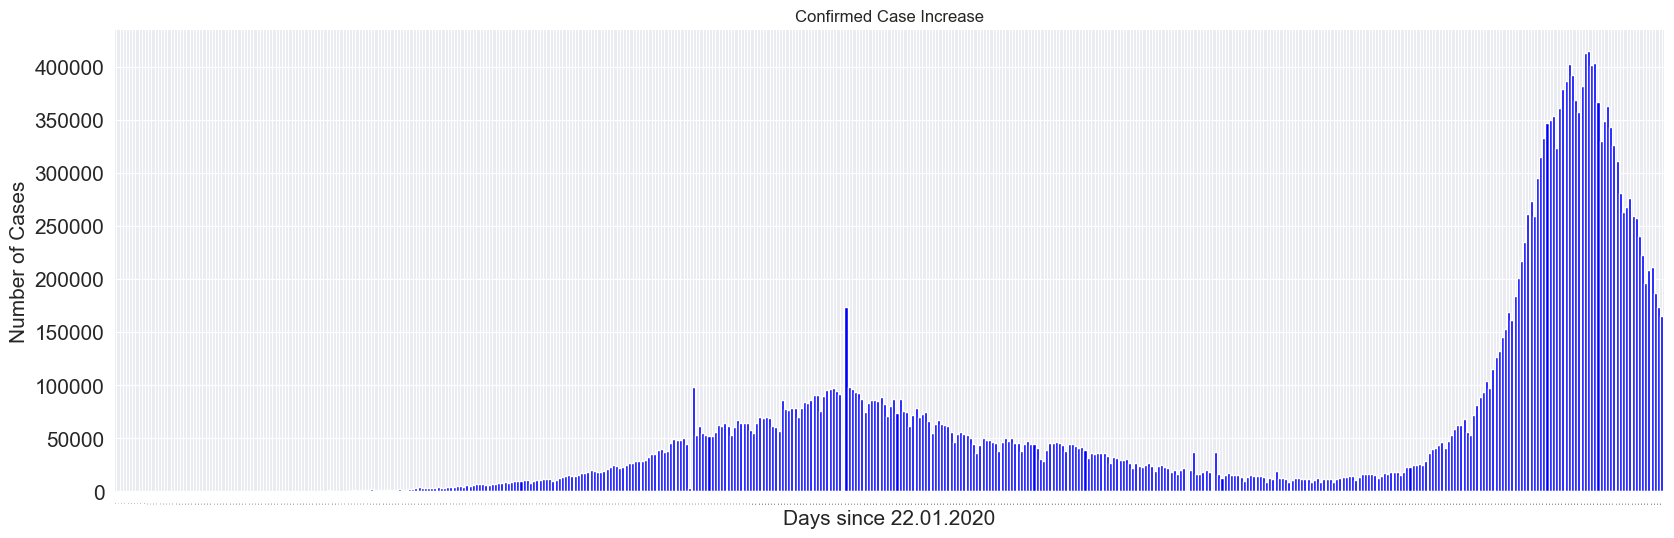

In [61]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Death cases increased in India till  29th May, 2021

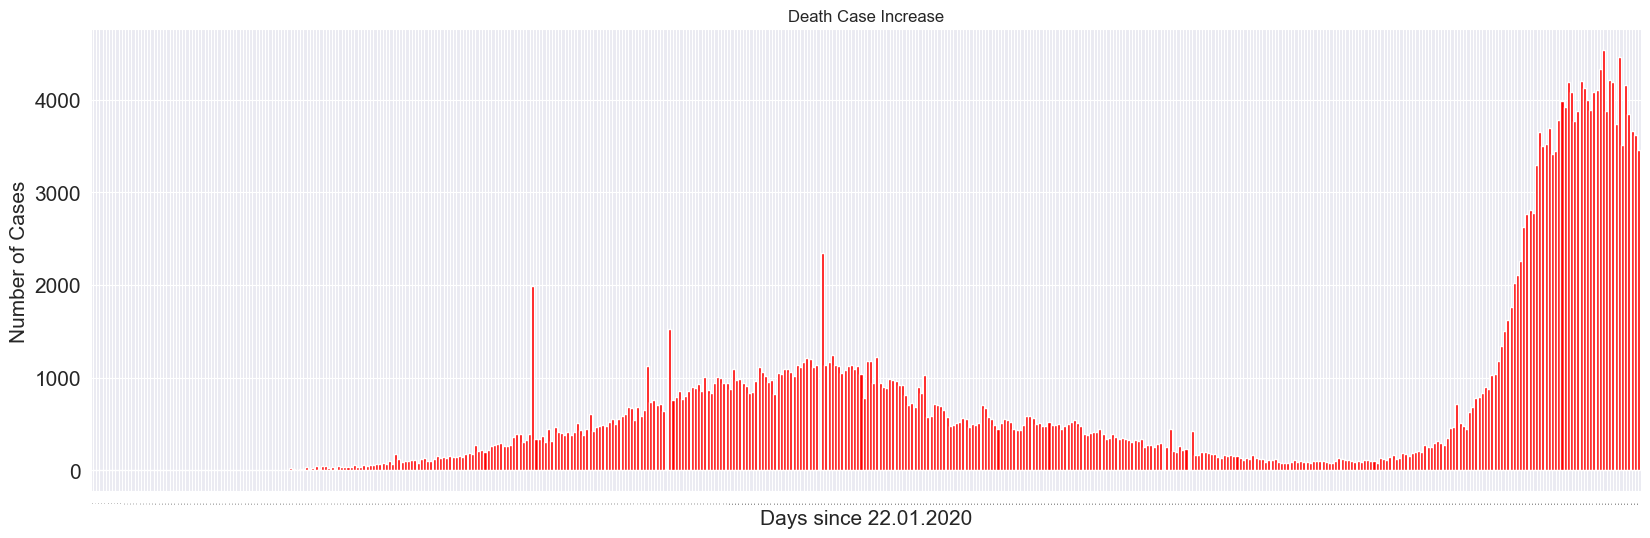

In [62]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Death Case Increase')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of confimed cases in India till  29th May, 2021

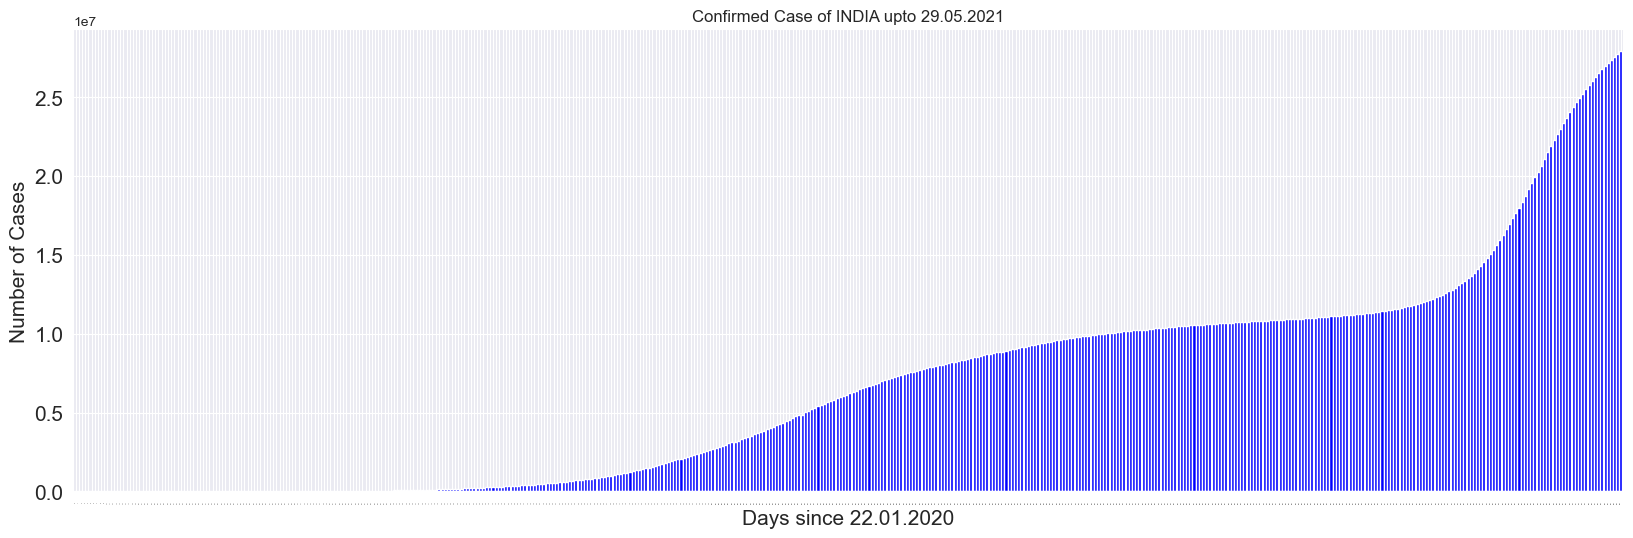

In [63]:
num_plot_india['Confirmed'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case of INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Recovered cases in India till  29th May, 2021

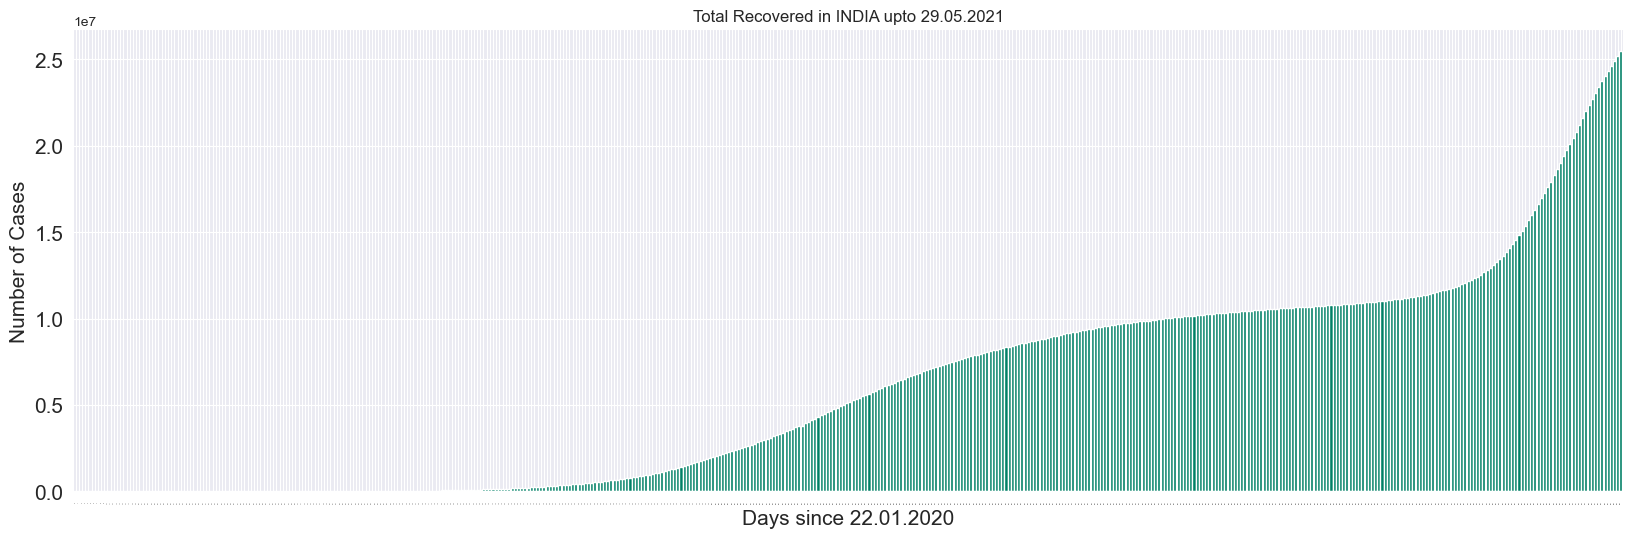

In [64]:
num_plot_india['Recovered'].plot(kind='bar',width=0.95,colormap='summer',figsize=(20,6),title='Total Recovered in INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### Total no. of Death cases in India till  29th May, 2021

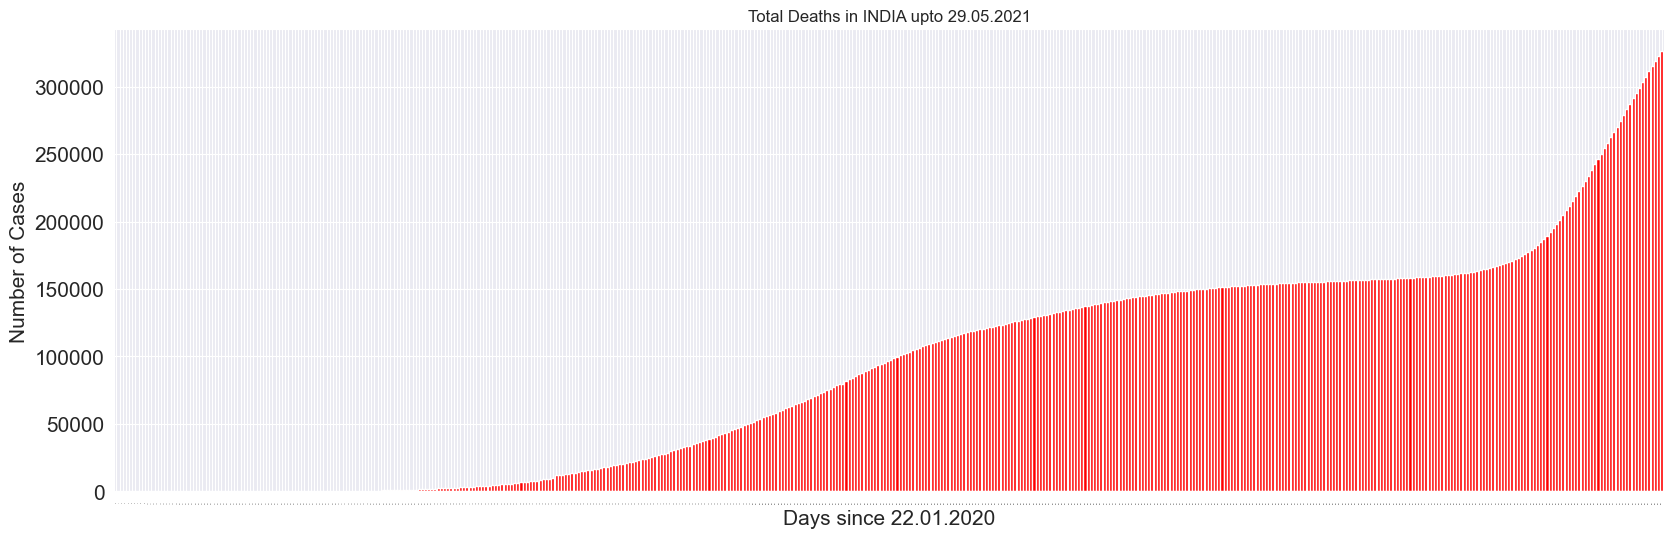

In [65]:
num_plot_india['Deaths'].plot(kind='bar',width=0.95,colormap='autumn',figsize=(20,6),title='Total Deaths in INDIA upto 29.05.2021')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()

### India revoked lockdown on 30th June, 2020

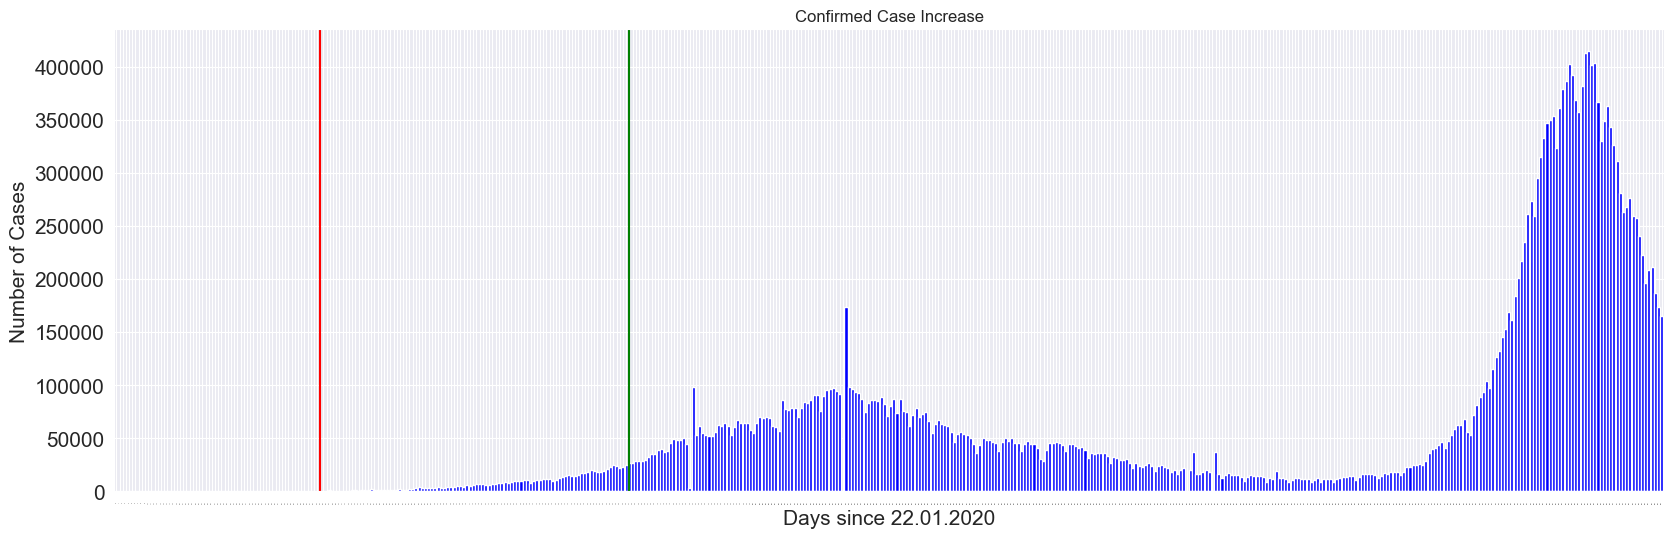

In [66]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.axvline (x=64, color = 'r')
plt.axvline (x= 161, color = 'g')
plt.xticks(size=0)
plt.yticks(size=15)
plt.ylabel('Number of Cases', size=15)
plt.xlabel('Days since 22.01.2020', size = 15)
plt.show()